In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
data = train.append(test, ignore_index=True,sort=False)
print(train.shape,test.shape,data.shape)

(11094, 9) (2774, 8) (13868, 9)


In [3]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [4]:
data.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [5]:
data.nunique()

Restaurant       8661
Location           35
Cuisines         2392
Average_Cost       26
Minimum_Order      20
Rating             33
Votes            1181
Reviews           811
Delivery_Time       7
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 9 columns):
Restaurant       13868 non-null object
Location         13868 non-null object
Cuisines         13868 non-null object
Average_Cost     13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Votes            13868 non-null object
Reviews          13868 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 975.2+ KB


In [7]:
data['Delivery_Time'].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [9]:
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')
Cuisines_list = data['Cuisines'].str.split(',')
from collections import Counter
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b]))
Cuisines_counter

Counter({'fastfood': 3862,
         'rolls': 620,
         'burger': 414,
         'salad': 284,
         'wraps': 97,
         'icecream': 480,
         'desserts': 1548,
         'italian': 751,
         'streetfood': 935,
         'mughlai': 1098,
         'northindian': 5999,
         'chinese': 4339,
         'cafe': 592,
         'beverages': 1789,
         'southindian': 1507,
         'thai': 205,
         'asian': 259,
         'mithai': 386,
         'momos': 397,
         'indonesian': 3,
         'biryani': 1161,
         'kerala': 73,
         'bihari': 14,
         'mexican': 143,
         'japanese': 72,
         'bakery': 864,
         'burmese': 13,
         'bubbletea': 6,
         'tea': 87,
         'pizza': 611,
         'lucknowi': 15,
         'mangalorean': 27,
         'european': 89,
         'continental': 694,
         'sandwich': 339,
         'healthyfood': 352,
         'bengali': 132,
         'american': 163,
         'mishti': 82,
         'hyderabadi'

In [10]:
# Cuisines_list_set = set([a for b in Cuisines_list.tolist() for a in b])
# for Cuisines in Cuisines_list_set:
#     print(Cuisines, ": ", train[train['Cuisines'].str.contains(Cuisines)]['Delivery_Time'].median())

In [11]:
data['Cuisines'] = data['Cuisines'].str.replace('rolls','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('burger','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('wraps','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('streetfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('momos','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('sandwich','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('fingerfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('barfood','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('rawmeats','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('hotdogs','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('cafe','fastfood')
data['Cuisines'] = data['Cuisines'].str.replace('pizza','fastfood')

data['Cuisines'] = data['Cuisines'].str.replace('icecream','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mithai','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bakery','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('bubbletea','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('mishti','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('paan','desserts')
data['Cuisines'] = data['Cuisines'].str.replace('frozenyogurt','desserts')

data['Cuisines'] = data['Cuisines'].str.replace('italian','european')
data['Cuisines'] = data['Cuisines'].str.replace('german','european')
data['Cuisines'] = data['Cuisines'].str.replace('spanish','european')
data['Cuisines'] = data['Cuisines'].str.replace('steak','european')
data['Cuisines'] = data['Cuisines'].str.replace('mediterranean','european')
data['Cuisines'] = data['Cuisines'].str.replace('brazilian','european')
data['Cuisines'] = data['Cuisines'].str.replace('belgian','european')
data['Cuisines'] = data['Cuisines'].str.replace('french','european')
data['Cuisines'] = data['Cuisines'].str.replace('portuguese','european')
data['Cuisines'] = data['Cuisines'].str.replace('african','european')
data['Cuisines'] = data['Cuisines'].str.replace('greek','european')

data['Cuisines'] = data['Cuisines'].str.replace('mexican','american')
data['Cuisines'] = data['Cuisines'].str.replace('bbq','american')
data['Cuisines'] = data['Cuisines'].str.replace('roastchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('charcoalchicken','american')
data['Cuisines'] = data['Cuisines'].str.replace('tex-mex','american')
data['Cuisines'] = data['Cuisines'].str.replace('southamerican','american')

data['Cuisines'] = data['Cuisines'].str.replace('arabian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('kebab','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('lebanese','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('afghan','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('iranian','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('middleeastern','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('turkish','middleeast')
data['Cuisines'] = data['Cuisines'].str.replace('israeli','middleeast')

data['Cuisines'] = data['Cuisines'].str.replace('chinese','chinese')

data['Cuisines'] = data['Cuisines'].str.replace('kerala','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bihari','regional')
data['Cuisines'] = data['Cuisines'].str.replace('Lucknowi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('mangalorean','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bengali','regional')
data['Cuisines'] = data['Cuisines'].str.replace('andhra','regional')
data['Cuisines'] = data['Cuisines'].str.replace('assamese','regional')
data['Cuisines'] = data['Cuisines'].str.replace('maharashtrian','regional')
data['Cuisines'] = data['Cuisines'].str.replace('chettinad','regional')
data['Cuisines'] = data['Cuisines'].str.replace('parsi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('odia','regional')
data['Cuisines'] = data['Cuisines'].str.replace('tamil','regional')
data['Cuisines'] = data['Cuisines'].str.replace('northeastern','regional')
data['Cuisines'] = data['Cuisines'].str.replace('bohri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('goan','regional')
data['Cuisines'] = data['Cuisines'].str.replace('gujarati','regional')
data['Cuisines'] = data['Cuisines'].str.replace('rajasthani','regional')
data['Cuisines'] = data['Cuisines'].str.replace('naga','regional')
data['Cuisines'] = data['Cuisines'].str.replace('awadhi','regional')
data['Cuisines'] = data['Cuisines'].str.replace('kashmiri','regional')
data['Cuisines'] = data['Cuisines'].str.replace('malwani','regional')

data['Cuisines'] = data['Cuisines'].str.replace('thai','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('konkan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('srilankan','seafood')
data['Cuisines'] = data['Cuisines'].str.replace('poké','seafood')

#data['Cuisines'] = data['Cuisines'].str.replace('thai','asian')
data['Cuisines'] = data['Cuisines'].str.replace('indonesian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('japanese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('burmese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('sushi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('cantonese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('tibetan','asian')
data['Cuisines'] = data['Cuisines'].str.replace('malaysian','asian')
data['Cuisines'] = data['Cuisines'].str.replace('vietnamese','asian')
data['Cuisines'] = data['Cuisines'].str.replace('korean','asian')
data['Cuisines'] = data['Cuisines'].str.replace('bangladeshi','asian')
data['Cuisines'] = data['Cuisines'].str.replace('nepalese','asian')


data['Cuisines'] = data['Cuisines'].str.replace('tea','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('juices','beverages')
data['Cuisines'] = data['Cuisines'].str.replace('coffee','beverages')

data['Cuisines'] = data['Cuisines'].str.replace('hyderabadi','biryani')
data['Cuisines'] = data['Cuisines'].str.replace('lucknowi','biryani')

data['Cuisines'] = data['Cuisines'].str.replace('indian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('modernnorthindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northindian','northindian')
data['Cuisines'] = data['Cuisines'].str.replace('northnorthindian','northindian')


data['Cuisines'] = data['Cuisines'].str.replace('southnorthindian','southindian')

data['Cuisines'] = data['Cuisines'].str.replace('salad','healthyfood')


In [12]:
data['Cuisines'] = data['Cuisines'].str.lower()
data['Cuisines'] = data['Cuisines'].str.replace(' ','')
Cuisines_list = data['Cuisines'].str.split(',')
from collections import Counter
Cuisines_counter = Counter(([a for b in Cuisines_list.tolist() for a in b]))
Cuisines_counter

Counter({'fastfood': 7979,
         'healthyfood': 636,
         'desserts': 3405,
         'european': 932,
         'mughlai': 1098,
         'northindian': 6028,
         'chinese': 4339,
         'beverages': 2127,
         'southindian': 1507,
         'seafood': 468,
         'asian': 508,
         'biryani': 1261,
         'regional': 691,
         'american': 382,
         'continental': 694,
         'middleeast': 467})

In [13]:
# for Cuisines in Cuisines_counter.keys():
#     data[Cuisines] = 0
#     data.loc[data['Cuisines'].str.contains(Cuisines), Cuisines] = 1
# del data['Cuisines']

In [14]:
data['Delivery_Time'] = data['Delivery_Time'].str.replace(' minutes','')
data['Delivery_Time']=pd.to_numeric(data['Delivery_Time'])

In [15]:
data['City']=data.Location.str.rpartition(',')[2]
data['Locality']=data.Location.str.rpartition(',')[0]

In [16]:
data.Locality[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi University-GTB Nagar'
data.Locality[data.City.str.contains('Mumbai Central')]='Mumbai Central'
data.Locality[data.City.str.contains('Majestic')]='Majestic'
data.Locality[data.City.str.contains('Delhi Cantt.')]='Delhi Cantt'
data.Locality[data.City.str.contains('Pune University')]='Pune University'
data['Locality'] = data['Locality'].str.strip()
data['Locality'] = data['Locality'].str.lower()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [17]:
data.City[data.City.str.contains('Delhi University-GTB Nagar')]='Delhi'
data.City[data.City.str.contains('Mumbai CST Area')]='Mumbai'
data.City[data.City.str.contains('Mumbai Central')]='Mumbai'
data.City[data.City.str.contains('India Gate')]='Delhi'
data.City[data.City.str.contains('Delhi Cantt.')]='Delhi'
data.City[data.City.str.contains('Maharashtra')]='Pune'
data.City[data.City.str.contains('Pune University')]='Pune'
data.City[data.City.str.contains('Gurgoan')]='Gurgaon'
data.City[data.City.str.contains('Electronic City')]='Bangalore'

# data.City[data.City.str.contains('Whitefield')]='Bangalore'
# data.City[data.City.str.contains('Marathalli')]='Bangalore'

data['City'] = data['City'].str.strip()
data['City'] = data['City'].str.lower()
del data['Location']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [18]:
data1=data.copy()

In [19]:
data['Average_Cost'] = data['Average_Cost'].str.replace("[^0-9]","")
data['Average_Cost'] = data['Average_Cost'].str.strip()
data['Average_Cost']=pd.to_numeric(data['Average_Cost'])

# data.Average_Cost.fillna(data.groupby(['City','Locality'])['Average_Cost'].transform('mean'), inplace=True)

data['Minimum_Order'] = data['Minimum_Order'].str.replace("[^0-9]","")
data['Minimum_Order'] = data['Minimum_Order'].str.strip()
data['Minimum_Order']=pd.to_numeric(data['Minimum_Order'])

In [20]:
data.Rating = data.Rating.replace("NEW",np.nan)
data.Rating = data.Rating.replace("-",np.nan)
data.Rating = data.Rating.replace("Opening Soon",np.nan)
data.Rating = data.Rating.replace("Temporarily Closed",np.nan)
data.Rating = data.Rating.astype('float')
# data.Rating.fillna(data.groupby(['City','Locality'])['Rating'].transform('mean'), inplace=True)
#data.Rating.fillna(0, inplace=True)

In [21]:
data.Votes = data.Votes.replace("-",np.nan)
data.Votes = data.Votes.astype('float')
# data.Votes.fillna(data.groupby(['City','Locality'])['Votes'].transform('mean'), inplace=True)
#data.Votes.fillna(0, inplace=True)

In [22]:
data.Reviews = data.Reviews.replace("-",np.nan)
data.Reviews = data.Reviews.astype('float')
# data.Reviews.fillna(data.groupby(['City','Locality'])['Reviews'].transform('mean'), inplace=True)
#data.Reviews.fillna(0, inplace=True)

In [23]:
print(data.shape)

(13868, 10)


In [24]:
data['total_div_of_reviews'] = data['Votes']/data['Reviews']
data['total_sum_of_reviews'] = data['Votes']*data['Reviews']

data['total_div_of_ratings'] = data['Votes']/data['Rating']
data['total_sum_of_ratings'] = data['Votes']*data['Rating']

data['total_div_of_Minimum_Order'] = data['Votes']/data['Minimum_Order']
data['total_sum_of_Minimum_Order'] = data['Votes']*data['Minimum_Order']

data['total_div_of_Average_Cost'] = data['Votes']/data['Average_Cost']
data['total_sum_of_Average_Cost'] = data['Votes']*data['Average_Cost']

data['total_div_of_ratings_Reviews'] = data['Rating']/data['Reviews']
data['total_sum_of_ratings_1'] = data['Rating']*data['Reviews']

data['total_div_of_Minimum_Order_1'] = data['Rating']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_1'] = data['Rating']*data['Minimum_Order']

data['total_div_of_Average_Cost_1'] = data['Rating']/data['Average_Cost']
data['total_sum_of_Average_Cost_1'] = data['Rating']*data['Average_Cost']

data['total_div_of_reviews_Minimum_Order_1'] = data['Reviews']/data['Minimum_Order']
data['total_sum_of_reviews_Minimum_Order_1'] = data['Reviews']*data['Minimum_Order']

data['total_div_of_reviews_Average_Cost_1'] = data['Reviews']/data['Average_Cost']
data['total_sum_of_reviews_Average_Cost_1'] = data['Reviews']*data['Average_Cost']

data['total_div_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']/data['Minimum_Order']
data['total_sum_of_Minimum_Order_Average_Cost_1'] = data['Average_Cost']*data['Minimum_Order']

In [25]:
data1['total_div_of_reviews']  = data['total_div_of_reviews']
data1['total_div_of_ratings']  = data['total_div_of_ratings']
data1['total_sum_of_Average_Cost']  = data['total_sum_of_Average_Cost']
data1['total_div_of_Average_Cost_1']  = data['total_div_of_Average_Cost_1']
data1['total_div_of_Minimum_Order_1']  = data['total_div_of_Minimum_Order_1']
data1['total_sum_of_Minimum_Order']  = data['total_sum_of_Minimum_Order']
data1['total_div_of_Average_Cost']  = data['total_div_of_Average_Cost']
data1['total_div_of_ratings_Reviews']  = data['total_div_of_ratings_Reviews']
data1['total_div_of_reviews_Average_Cost_1']  = data['total_div_of_reviews_Average_Cost_1']
data1['total_sum_of_Average_Cost_1']  = data['total_sum_of_Average_Cost_1']
data1['total_sum_of_reviews_Minimum_Order_1']  = data['total_sum_of_reviews_Minimum_Order_1']
data1['total_div_of_Minimum_Order']  = data['total_div_of_Minimum_Order']
data1['total_sum_of_ratings_1']  = data['total_sum_of_ratings_1']
data1['total_sum_of_reviews']  = data['total_sum_of_reviews']
data1['total_sum_of_ratings']  = data['total_sum_of_ratings']
data1['total_sum_of_reviews_Average_Cost_1']  = data['total_sum_of_reviews_Average_Cost_1']
data1['total_sum_of_Minimum_Order_1']  = data['total_sum_of_Minimum_Order_1']
data1['total_div_of_reviews_Minimum_Order_1']  = data['total_div_of_reviews_Minimum_Order_1']
data1['total_div_of_Minimum_Order_Average_Cost_1']  = data['total_div_of_Minimum_Order_Average_Cost_1']
data1['total_sum_of_Minimum_Order_Average_Cost_1']  = data['total_sum_of_Minimum_Order_Average_Cost_1']

In [26]:
data1.shape

(13868, 30)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(13,13))
sns.heatmap(data1.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [28]:
train_x=data1[~data1['Delivery_Time'].isnull()]
train_y=train_x['Delivery_Time']
test_x=data1[data1['Delivery_Time'].isnull()]

del train_x['Delivery_Time']
del test_x['Delivery_Time']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 18121995, stratify=train_y)

# CATBOOST

In [30]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

# Stratified 5-Fold

In [31]:
import catboost
def make_classifier():
    model = catboost.CatBoostClassifier(
        iterations=30000,
        random_state=18121995,
        learning_rate=0.01,
        loss_function='MultiClass',
        early_stopping_rounds=200,
    )
    return model

In [32]:
import os, sys, datetime
from time import time
import catboost
from sklearn.model_selection import StratifiedKFold

start_time = time()

NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=False, random_state=18121995)
models = []
scores = []
for fold, (train_ids, test_ids) in enumerate(folds.split(train_x, train_y)):
    print('● Fold :', fold+1)
    model = make_classifier()
    model.fit(train_x.loc[train_ids], train_y.loc[train_ids], 
              eval_set=(train_x.loc[test_ids], train_y.loc[test_ids]),
              use_best_model=False,
              verbose=500,
              cat_features=categorical_features_indices)    
    models.append(model)
    print('\n')

print('finished in {}'.format( 
    str(datetime.timedelta(seconds=time() - start_time))))

● Fold : 1
0:	learn: 1.9152420	test: 1.9154858	best: 1.9154858 (0)	total: 210ms	remaining: 1h 44m 45s
500:	learn: 0.5892425	test: 0.5085193	best: 0.5085193 (500)	total: 7m 54s	remaining: 7h 45m 44s
1000:	learn: 0.5614690	test: 0.4855592	best: 0.4855592 (1000)	total: 14m 16s	remaining: 6h 53m 29s
1500:	learn: 0.5356555	test: 0.4747040	best: 0.4747040 (1500)	total: 24m 12s	remaining: 7h 39m 46s
2000:	learn: 0.5179895	test: 0.4702693	best: 0.4702693 (2000)	total: 33m 23s	remaining: 7h 47m 12s
2500:	learn: 0.5027555	test: 0.4675298	best: 0.4674977 (2495)	total: 42m 13s	remaining: 7h 44m 16s
3000:	learn: 0.4889398	test: 0.4659033	best: 0.4658852 (2998)	total: 50m 50s	remaining: 7h 37m 22s
3500:	learn: 0.4763554	test: 0.4648889	best: 0.4648803 (3497)	total: 59m 33s	remaining: 7h 30m 44s
4000:	learn: 0.4645750	test: 0.4642382	best: 0.4642215 (3972)	total: 1h 7m 57s	remaining: 7h 21m 34s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.4639574697
bestIteration = 4143



● F

# Max Voting

In [37]:
from scipy import stats

predictions = []
for model in models:
    predictions.append(model.predict(train_x).astype(int))
predictions = np.concatenate(predictions, axis=1)
df = pd.DataFrame(predictions)

vote = stats.mode(predictions, axis=1)[0].reshape(-1)
df['vote'] = vote
df['y'] = train_y
df

,0,1,2,3,vote,y
0,30,30,30,30,30,30.0
1,30,30,30,30,30,30.0
2,65,65,65,65,65,65.0
3,30,30,30,30,30,30.0
4,45,65,65,65,65,65.0
5,30,30,30,30,30,30.0
6,30,30,30,30,30,30.0
7,45,45,45,45,45,45.0
8,30,30,30,30,30,30.0
9,45,65,65,65,65,65.0


In [38]:
predictions = []
for model in models:
    predictions.append(model.predict(test_x))
predictions = np.concatenate(predictions, axis=1)
# Voting
predictions = stats.mode(predictions, axis=1)[0].reshape(-1)
print(predictions.shape)

(2774,)


In [39]:
a=pd.DataFrame()
# predcb=predcb.astype(int)
# predcb=predcb.flatten()
a['Delivery_Time']=np.round(predictions).astype('int')
a['Delivery_Time'] = a['Delivery_Time'].replace({30:'30 minutes', 45:'45 minutes', 65:'65 minutes', 120:'120 minutes', 20:'20 minutes', 80:'80 minutes', 10:'10 minutes'})
a.to_excel('cb_all_cat_1.0.xlsx', index=False)

# Feature Importance

In [40]:
sorted(zip(model.feature_importances_,train_x),reverse=True)

[(10.377356183231015, 'Restaurant'),
 (7.930605897929039, 'Reviews'),
 (7.749546794567969, 'City'),
 (6.588395525325439, 'total_div_of_reviews'),
 (6.411406811556494, 'Locality'),
 (5.935268823425313, 'Rating'),
 (5.428381087287029, 'Votes'),
 (5.387031557527161, 'Cuisines'),
 (4.3792849275016, 'Average_Cost'),
 (4.180058416281173, 'Minimum_Order'),
 (3.751974106226216, 'total_div_of_Minimum_Order_1'),
 (3.0631764497723717, 'total_div_of_ratings'),
 (3.0558233082290807, 'total_sum_of_Average_Cost'),
 (2.4972015949934048, 'total_div_of_Average_Cost_1'),
 (2.4123341645863556, 'total_div_of_Average_Cost'),
 (2.3560221426473746, 'total_sum_of_Minimum_Order'),
 (2.297927972337105, 'total_sum_of_ratings'),
 (1.9966706060061465, 'total_sum_of_reviews'),
 (1.8849892206462362, 'total_sum_of_Average_Cost_1'),
 (1.7350044194533418, 'total_div_of_reviews_Average_Cost_1'),
 (1.7284593167392528, 'total_div_of_ratings_Reviews'),
 (1.689383109834103, 'total_div_of_Minimum_Order'),
 (1.6064829946444403

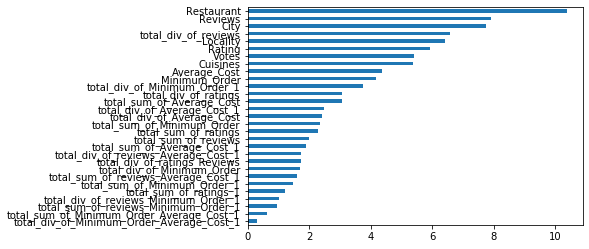

In [41]:
import matplotlib.pyplot as plt
feat_importances=pd.Series(model.feature_importances_,index=train_x.columns)
feat_importances.nsmallest(1000).plot(kind='barh')
plt.show()